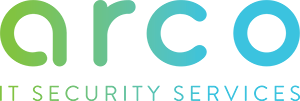

<IPython.core.display.Javascript object>

In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from IPython.display import Javascript
import dash 
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import os
from IPython.display import Image
## gets the current path to print image
current_path=(os.getcwd()+"\\Arco.png")
current_path=current_path.replace("\\","/")



#This is where the file upload button will be created
upload_inventory = widgets.FileUpload(
    description = 'Upload CSV',
    style = {'button_color':'lightgreen'},
    multiple = False,
    accept = '.csv'
)

upload_inventory.style.button_color = 'lightgreen'

#This is where the file upload button will be created
upload_flow_data = widgets.FileUpload(
    description = 'Upload CSV',
    style = {'button_color':'lightgreen'},
    multiple = False,
    accept = '.csv'
)

#This is where the file upload button will be created
upload_hostname_file = widgets.FileUpload(
    description = 'Upload CSV',
    multiple = False,
    accept = '.csv'
)
application_list = []

## This will be a count to see if the CSV file has already been generated
file_it_count = 0
# --- Flow Data Slider and TextBox --
flow_data_slider = widgets.IntSlider(
    value=1,
    min=1,
    max= 2000,#find a better way to handle the upper bound here
    step=1,
    description='Rows:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
#-----------------Flow Data Setup-----------------------------
flow_text = widgets.IntText()
widgets.jslink((flow_data_slider, 'value'), (flow_text, 'value'))
show_flow_data = widgets.Button(description = 'Show Flow Data')
show_flow_data.style.button_color = 'lightgreen'
find_unknown_ips = widgets.Button(description = 'Find IPs')
find_unknown_ips.style.button_color = 'lightgreen'

#generate the button for the graph
asset_connection_button = widgets.Button(description = "Generate Asset Connection Graph",
                                        layout = widgets.Layout(width='auto', height='40px'))
asset_connection_button.style.button_color = 'lightgreen'

#Creates the text box for row omition
deny_list_input = widgets.Text(placeholder = "Separate the row values with commas",
                        description = "Rows: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='40px'))#auto adjusts size

flow_data_output_area = widgets.Output()
unknown_ips_output = widgets.Output()


## function needed for submit 
def run_all(ev):
    Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())')

## submit_button
button = widgets.Button(description="Submit")
button.style.button_color = 'lightgreen'



display(Image(filename=current_path,width=400, height=400))

flow_data_accordion = widgets.Accordion(children=[widgets.VBox([upload_flow_data,button]), widgets.HBox([widgets.VBox([flow_data_slider]), widgets.VBox([flow_text])]),
                                                  flow_data_output_area,
                                                  find_unknown_ips, unknown_ips_output, asset_connection_button])
flow_data_accordion.set_title(0, 'Import Flow Data')
flow_data_accordion.set_title(1, 'Slider to Select How Many Rows You Would Like To See')
flow_data_accordion.set_title(2, 'Flow Data Output Area')
flow_data_accordion.set_title(3, 'Find Unknown IP Addresses')
flow_data_accordion.set_title(4, 'Unknown IP Address Output')
flow_data_accordion.set_title(5, 'Generate Asset Connection Graph')
flow_data_accordion
#-----------------Asset Inventory Setup-----------------------------
#This is a slider to select how many rows would like to be displayed
slider_result = widgets.IntSlider(
    value=1,
    min=1,
    max= 2000, #find a better way to handle the upper bound here
    step=1,
    description='Rows:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
link_text = widgets.IntText()
widgets.jslink((slider_result, 'value'), (link_text, 'value'))
#Creates the button for showing resulting CSV
ip_address_area = widgets.Text(placeholder = "Input the IP Address",
                        description = "IP: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size
hostname_area = widgets.Text(placeholder = "Input the Hostname",
                        description = "Hostname: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size
asset_inventory_output_area = widgets.Output()

asset_inventory_accordion = widgets.Accordion(children=[widgets.VBox([upload_inventory,button]), widgets.HBox([widgets.VBox([slider_result]), widgets.VBox([link_text])]), asset_inventory_output_area])
asset_inventory_accordion.set_title(0, 'Import Asset Inventory Data')
asset_inventory_accordion.set_title(1, 'Slider to Select How Many Rows You Would Like To See')
asset_inventory_accordion.set_title(2, 'Asset Inventory Output Area')
asset_inventory_accordion

#-----------------IP Range Setup-----------------------------
#Creates the text box for IP Prefix
ip_prefix_area = widgets.Text(placeholder = "Input the IP Prefix",
                        description = "IP Prefix: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size
#Creates the text box for Tag Name
range_name_area = widgets.Text(placeholder = "Input the Range Name",
                        description = "Name: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size
#Creates the text box for Tag Description
range_description_area = widgets.Text(placeholder = "Input the Range Description",
                        description = "Description: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size

range_output_area = widgets.Output()
row_tag_list =[]
#Creates the row add button

range_accordion_one = widgets.Accordion(children=[widgets.HBox([widgets.VBox([ip_prefix_area]),
                                                                                widgets.VBox([range_name_area]),
                                                                                widgets.VBox([range_description_area])]), range_output_area])

range_accordion_one.set_title(0, 'Text Boxes for Range Configuration')
range_accordion_one.set_title(1, 'Range Output Area')
range_accordion_one
button.on_click(run_all)

#-----------------Application Setup-----------------------------
#Creates the text box for Port
port_area = widgets.Text(placeholder = "Input the Port Number",
                        description = "Port: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size
#Creates the dropdown for protocol
protocol_dropdown = widgets.Dropdown(options = ['TCP', 'UDP'],
                                     description = 'Protocol',
                                    layout = widgets.Layout(width='auto', height='auto'))
                                     
#Creates the text box for App Name
app_name_area = widgets.Text(placeholder = "Input the Application Name",
                        description = "Name: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size
#Creates the text box for App Description
app_description_area = widgets.Text(placeholder = "Input the Application Description",
                        description = "Description: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size
app_output_area = widgets.Output()
row_app_list =[]
#Creates the row add button
application_accordion_one = widgets.Accordion(children=[widgets.HBox([widgets.VBox([port_area]),
                                                                      widgets.VBox([protocol_dropdown]),
                                                                                widgets.VBox([app_name_area]),
                                                                                widgets.VBox([app_description_area])]), app_output_area])

application_accordion_one.set_title(0, 'Text Boxes for Application Configuration')
application_accordion_one.set_title(1, 'Application Output Area')
application_accordion_one
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
button.on_click(run_all)

#-----------------Rule Setup-----------------------------

application_name = widgets.Textarea(placeholder = "Input the Application Name",
                        description = "Application: ",
                        disabled = False,
                        layout = widgets.Layout(width='50%', height='auto'))#auto adjusts size
                                     
#Creates the text box for Source Area
source_text = widgets.Textarea(placeholder = "Input the Source",
                        description = "Source: ",
                        disabled = False,
                        layout = widgets.Layout(width='50%', height='auto'))#auto adjusts size
#Creates the text box for Target Area
target_area = widgets.Textarea(placeholder = "Input the Target",
                        description = "Target: ",
                        disabled = False,
                        layout = widgets.Layout(width='50%', height='auto'))#auto adjusts size
#Creates the text box for Decision Dropdown
decision_dropdown = widgets.Dropdown(options = ['Allow', 'Disallow'],
                                     description = 'Decision',
                                    layout = widgets.Layout(width='auto', height='auto'))
#Creates the text box for Description Area
description_area = widgets.Text(placeholder = "Input the Description",
                        description = "Description: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size
rule_output_area = widgets.Output()
machine_learning_output_area = widgets.Output()
simulate_output_area = widgets.Output()
row_rule_list =[]
#Creates the row add button for rule (ML generated)
add_ML_rule = widgets.Button(description = 'Auto Generate', layout = widgets.Layout(width='auto', height='auto'))
add_ML_rule.style.button_color = 'lightgreen'
add_interesting_ML_rule = widgets.Button(description = 'Interesting Rules', layout = widgets.Layout(width='auto', height='auto'))
add_interesting_ML_rule.style.button_color = 'red'

#simulator = widgets.Button(description = 'Simulate', layout = widgets.Layout(width='auto', height='auto'))
source_ip_entry = widgets.Textarea(placeholder = "Input the Source IP Address",
                        description = "IP: ",
                        disabled = False,
                        layout = widgets.Layout(width='50%', height='auto'))#auto adjusts size
destination_ip_entry = widgets.Textarea(placeholder = "Input the Destination IP Address",
                        description = "IP: ",
                        disabled = False,
                        layout = widgets.Layout(width='50%', height='auto'))#auto adjusts size
source_port = widgets.Textarea(placeholder = "Input the Source Port",
                        description = "Port: ",
                        disabled = False,
                        layout = widgets.Layout(width='50%', height='auto'))#auto adjusts size
destination_port = widgets.Text(placeholder = "Input the Destination Port",
                        description = "Port: ",
                        disabled = False,
                        layout = widgets.Layout(width='50%', height='auto'))#auto adjusts size

left_box = widgets.HBox([application_name, source_text, target_area, decision_dropdown, description_area])
flow_data_simulation = widgets.VBox([widgets.HBox([source_ip_entry, source_port, destination_ip_entry, destination_port]), simulate_output_area])
#right_box = widgets.HBox([target_area, decision_dropdown, description_area])

demo_location = widgets.HBox([add_ML_rule, add_interesting_ML_rule]) #this can be removed after demo and line 262 must be modified to have "add_ML_rule" only

rule_accordion_one = widgets.Accordion(children=[demo_location, machine_learning_output_area,widgets.VBox([left_box]), rule_output_area, flow_data_simulation])

rule_accordion_one.set_title(0, 'Machine Learning Generator')
rule_accordion_one.set_title(1, 'Machine Learning Output Area')
rule_accordion_one.set_title(2, 'Text Boxes for Rule Configuration')
rule_accordion_one.set_title(3, 'Rule Output Area')
rule_accordion_one.set_title(4, 'Simulate Flow')
#rule_accordion_one.set_title(5, 'Simulation Area')

rule_accordion_one
add_ML_rule.on_click(run_all)

#-----------------Edit/Modify Setup-----------------------------

#----------------------Tags-----------------


tag_name = widgets.Text(placeholder = "Insert the First Tag Name",
                        description = "First Tag: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='40px'))#auto adjusts size
tag_name2 = widgets.Text(placeholder = "Insert the Second Tag Name",
                        description = "Second Tag: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='40px'))#auto adjusts size

which_ip = widgets.Textarea(placeholder = "Input the IP Address",
                        description = "IP: ",
                        disabled = False,
                        layout = widgets.Layout(width='50%', height='auto'))#auto adjusts size
                                     
action_dropdown = widgets.Dropdown(options = ['Add', 'Modify', 'Delete'],
                                     description = 'Action',
                                    layout = widgets.Layout(width='auto', height='auto'))

#----------------------Ranges-----------------
desired_ip_range = widgets.Text(placeholder = "Input the IP Range",
                        description = "Range: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='auto'))#auto adjusts size

new_range_name = widgets.Text(placeholder = "Insert the New Range Name",
                        description = "Name: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='40px'))#auto adjusts size
range_dropdown = widgets.Dropdown(options = ['Modify', 'Delete'],
                                     description = 'Action',
                                    layout = widgets.Layout(width='auto', height='auto'))

#-------------------Applications-------------
target_application_name = widgets.Text(placeholder = "Insert the Desired Range Name",
                        description = "Name: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='40px'))#auto adjusts size
application_action = widgets.Dropdown(options = ['Modify', 'Delete'],
                                     description = 'Action',
                                    layout = widgets.Layout(width='auto', height='auto'))
new_app_name = widgets.Text(placeholder = "Insert the New Application Name",
                        description = "Name: ",
                        disabled = False,
                        layout = widgets.Layout(width='auto', height='40px'))#auto adjusts size

left_box = widgets.HBox([which_ip, action_dropdown])
right_box = widgets.HBox([tag_name, tag_name2])
tag_box = widgets.VBox([left_box, right_box])
hostname_box = widgets.HBox([widgets.VBox([ip_address_area]), widgets.VBox([widgets.VBox([hostname_area]), widgets.HBox([upload_hostname_file])])])
range_box = widgets.HBox([desired_ip_range, range_dropdown, new_range_name])
application_box = widgets.HBox([target_application_name, application_action, new_app_name])

action_accordion = widgets.Accordion(children=[tag_box, hostname_box, range_box, application_box])

action_accordion.set_title(0, 'Asset Inventory - Add/Modify/Delete Tag')
action_accordion.set_title(1, 'Asset Inventory - Hostname Configuration')
#action_accordion.set_title(2, 'Flow Data - Row Drop')
action_accordion.set_title(2, 'Range - Modify/Delete')
action_accordion.set_title(3, 'Application - Modify/Delete')
action_accordion
   

#------------------Phase 1 Tab-----------------------------------

tab_nest = widgets.Tab()
#The line right below this one has placeholders
tab_nest.children = [flow_data_accordion, asset_inventory_accordion, range_accordion_one, application_accordion_one, rule_accordion_one, action_accordion]
tab_nest.set_title(0, 'Flow Data')
tab_nest.set_title(1, 'Asset Inventory')
tab_nest.set_title(2, 'Ranges')
tab_nest.set_title(3, 'Applications')
tab_nest.set_title(4, 'Rules')
tab_nest.set_title(5, 'Modifications')
tab_nest
                 


In [3]:
import codecs
import csv
import re
from IPython.display import display, clear_output
#Imports for connection graph
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import numpy as np
import firewall_wrapper
import firewall_simulator


#-------Flow Data--------- checking if there is a file imported
#this takes the resulting dictionary and assigns it to a variable 


uploaded_file_val_fd=upload_flow_data.value


if(len(uploaded_file_val_fd)!=0):
    upload_flow_data.observe(upload_flow_data.value,'area')
    
   ## if(len(uploaded_file_val_fd) == 0):
     ##   raise Exception("You must input a file")
    #access whats important
    file_name_fd = next(iter(uploaded_file_val_fd))
    #we get the first element in the dictionary
    uploaded_file_content_fd = uploaded_file_val_fd[file_name_fd]['content']

    
    #decodes from bytes to list and splits the data accordingly
    data_fd = uploaded_file_content_fd.decode('utf-8').splitlines()
    #below line removes quotes from decoding by iterating through list
    data_fd = [i.replace('"', ' ') for i in data_fd]

    #This creates a csv file within the directory that has the original data
    if(file_it_count == 0): #this if statement ensures the file isnt created everytime
        with open("flow_data.csv", "w") as csv_file:
            writer = csv.writer(csv_file, delimiter = '\t')
            for line in data_fd:
                writer.writerow(re.split('\s+,',line))
        #drop the stuff that might not be important        
        drop_column_flows = pd.read_csv('flow_data.csv')
        drop_column_flows = drop_column_flows.drop(['Packets','Bytes', 'Packets A -> B', 'Packets B -> A',
                                                   'Bytes A -> B', 'Bytes B -> A', 'Rel Start',
                                                   'Duration','Bits/s A -> B', 'Bits/s B -> A' ], axis = 1)
        drop_column_flows.to_csv('flow_data.csv', index = False)

    #This gets the number of rows within the CSV
    with open('flow_data.csv') as counter:
        row_counter_with_header_fd = sum(1 for line in counter)
    row_counter_without_header_fd = row_counter_with_header_fd-1

    #shows the flow data

    #original_flow_data = pd.read_csv('flow_data.csv', skiprows = range(1,(row_counter_with_header_fd - flow_data_slider.value)))


    def show_flow(b):
        original_flow_data = pd.read_csv('flow_data.csv', skiprows = range(1,(row_counter_with_header_fd - flow_data_slider.value)))
        with flow_data_output_area:
            clear_output()
            display(original_flow_data)

    flow_data_slider.observe(show_flow, 'value')



    #drop rows flow 
    #original_flow_data = pd.read_csv('flow_data.csv', skiprows = range(1,(row_counter_with_header_fd - flow_data_slider.value)))
    def drop_rows(a):
        if(deny_list_input.value!=''):
            #separate variables
            deny_list = deny_list_input.value.split(",")
            #convert into integers
            deny_list_ints = [int(i) for i in deny_list]
            #deny_list_ints #this just shows what the contents are
        if(deny_list_input.value == ''):
            deny_list = deny_list_input.value.split(",")
            deny_list_ints =[0]
        if(deny_list[0]==''):
            raise Exception("This button cannot be used if there is no text input.")

        with flow_data_output_area:
            clear_output()
            show_flow()
            original_flow_data = original_flow_data.drop(original_flow_data.index[deny_list_ints], inplace = True)
            show_flow()
            #display(original_flow_data)


    deny_list_input.on_submit(drop_rows)

    #display(asset_connection_button)

    def generate_asset_connection_graph(b):
        matplotlib_axes_logger.setLevel('ERROR')

        common_port_cutoff = 1024

        flow_data = pd.read_csv('flow_data.csv', header=0)
        ip_data = pd.read_csv('inventory_data.csv', header=0, index_col=0)

        def map_ips_to_col(address_name, col_name):
            site_list = []
            for ip in flow_data[address_name]:
                try:
                    name = ip_data.at[ip, col_name]
                    site_list.append(name)
                except:
                    site_list.append(pd.NaT)
            return pd.DataFrame(site_list, columns=[address_name])

        site_a = map_ips_to_col('Address A', 'Plant Area')
        site_b = map_ips_to_col('Address B', 'Plant Area')
        port_a = flow_data['Port A']
        port_b = flow_data['Port B']

        data = pd.concat([site_a, port_a, site_b, port_b], 1)
        data = data.dropna()

        #print('Data loaded')

        main_graph = {}
        for i, d in data.iterrows():
            ports = []
            if d['Port A'] <= common_port_cutoff:
                ports.append(d['Port A'])
            if d['Port B'] <= common_port_cutoff:
                ports.append(d['Port B'])
            if d['Address A'] in main_graph:
                connections = main_graph[d['Address A']]
                if d['Address B'] in connections:
                    used_ports = connections[d['Address B']]
                    for p in ports:
                        if not p in used_ports:
                            used_ports.append(p)
                elif len(ports) > 0:
                    connections[d['Address B']] = ports
            elif len(ports) > 0:
                main_graph[d['Address A']] = {d['Address B']: ports}

        #print('Main graph created')

        inter_graph = {}
        ip_a = flow_data['Address A']
        ip_b = flow_data['Address B']
        for i in range(site_a.shape[0]):
            site_a_i = site_a['Address A'][i]
            ports = []
            if port_a[i] <= common_port_cutoff:
                ports.append(port_a[i])
            if port_b[i] <= common_port_cutoff:
                ports.append(port_b[i])
            if site_a_i == site_b['Address B'][i]:
                ip_a_i = ip_a[i]
                ip_b_i = ip_b[i]
                if site_a_i in inter_graph:
                    if ip_a_i in inter_graph[site_a_i]:
                        if ip_b_i in inter_graph[site_a_i][ip_a_i]:
                            used_ports = inter_graph[site_a_i][ip_a_i][ip_b_i]
                            for p in ports:
                                if not p in used_ports:
                                    used_ports.append(p)
                        elif len(ports) > 0:
                            inter_graph[site_a_i][ip_a_i][ip_b_i] = ports
                    elif len(ports) > 0:
                        inter_graph[site_a_i][ip_a_i] = {ip_b_i: ports}
                elif len(ports) > 0:
                    inter_graph[site_a_i] = {ip_a_i: {ip_b_i: ports}}

        #print('Internal graphs created')

        def formate_node_label(label):
            if label == 'Other ProcN Devices':
                return 'Other ProcN\n Devices'
            if label == 'EAF Dust Washing':
                return 'EAF Dust\nWashing'
            return label

        def plot_graph(graph_name, graph, fig_size):
            vis_graph = nx.DiGraph()
            edge_labels = {}
            for k0, v0 in graph.items():
                for k1, v1 in v0.items():
                    if k0 != k1:
                        if len(v1) > 0:
                            vis_graph.add_edge(k1, k0)
                            edge_labels[(k0, k1)] = ', '.join(map(str, v1))

            pos = nx.kamada_kawai_layout(vis_graph)
            fig = plt.figure(figsize=fig_size, dpi=300)
            nx.draw(vis_graph, pos, node_size=5500, node_color=[0.9,0.9,0.9], labels={node:formate_node_label(str(node)) for node in vis_graph.nodes()}, font_size=10, edgecolors='black')
            nx.draw_networkx_edge_labels(vis_graph, pos, edge_labels=edge_labels)

            plt.savefig('asset_connection_' + graph_name + '.png')

        plot_graph('Main', main_graph, (9, 9))
        #print('Plotted main graph')

        for site, connections in inter_graph.items():
            plot_graph(site, connections, (7, 7))
            #print('Plotted ' + site + ' internal graph')

    asset_connection_button.observe(asset_connection_button.on_click(generate_asset_connection_graph))


    #-------Inventory--------- checking if there is a file imported
    #this takes the resulting dictionary and assigns it to a variable 
    uploaded_file_val = upload_inventory.value
    if(len(uploaded_file_val) == 0):
        raise Exception("You must input a file")

    #access whats important
    file_name = next(iter(uploaded_file_val))
    #we get the first element in the dictionary
    uploaded_file_content = uploaded_file_val[file_name]['content']

    #decodes from bytes to list and splits the data accordingly
    data = uploaded_file_content.decode('utf-8').splitlines()
    #below line removes quotes from decoding by iterating through list
    data = [i.replace('"', ' ') for i in data]



    if(file_it_count == 0):
    #This creates a csv file within the directory that has the original data
        with open("inventory_data.csv", "w") as csv_file:
            writer = csv.writer(csv_file, delimiter = '\t')
            for line in data:
                writer.writerow(re.split('\s+, ',line))
        #remove the columns that don't really matter        
        drop_column_inventory = pd.read_csv('inventory_data.csv')
        drop_column_inventory = drop_column_inventory.drop(['Fix license','Full IP'], axis = 1)
        drop_column_inventory.to_csv('inventory_data.csv', index = False)

    #This gets the number of rows within the CSV
    with open('inventory_data.csv') as counter:
        row_counter_with_header = sum(1 for line in counter)
    row_counter_without_header = row_counter_with_header-1

    #------Asset Inventory HostName Config-----------

    #this gets the file val if there is a file
    uploaded_file_val_hostname = upload_hostname_file.value
    if(len(uploaded_file_val_hostname) != 0):
        hostname_file_name = next(iter(uploaded_file_val_hostname))
        #we get the first element in the dictionary
        hostname_uploaded_file_content = uploaded_file_val_hostname[hostname_file_name]['content']
        data_hostname = hostname_uploaded_file_content.decode('utf-8').splitlines()
        #below line removes quotes from decoding by iterating through list
        data_hostname = [i.replace('"', ' ') for i in data_hostname]
        with open("hostname.csv", "w") as csv_file:
            writer = csv.writer(csv_file, delimiter = '\t')
            for line in data_hostname:
                writer.writerow(re.split('\s+,',line))
        hostname_csv = pd.read_csv('hostname.csv')
        drop_column_inventory["Hostname"] = ""
        for index in hostname_csv.index:
            for sec_index in drop_column_inventory.index:
                if(hostname_csv.loc[index, "IP Address"] == drop_column_inventory.loc[sec_index, "LAN IP Address"]):
                    drop_column_inventory.loc[sec_index, "Hostname"] = hostname_csv.loc[index, "Host Name"]
    drop_column_inventory.to_csv('inventory_data.csv', index = False)

    #--------Adds Hostname Column to Dataframe--------
    def assign_names(iprange,Name):

        min = re.sub('\/.*$', "", iprange)
        min = re.sub('.\\d{0,3}.\\d{0,3}\\d{0,3}\\.\\d{0,3}.', "", min)
        max = re.sub('^.*?/', '', iprange)

        if int(min)>=256 or int(max) >=256 or int(min) <0 or int(max)<0 or int(min)>int(max):
            #print('Invalid Arguments, a valid range is between 0-256')
            return
        prefix = re.sub('/', "", iprange)
        prefix= re.sub('\\.\\d+$',"",prefix)

        df=pd.read_csv('inventory_data.csv')

        if "Hostname" not in df:
            df['Hostname']=""

        for name,data in df.iteritems():
            if 'Address' in name or 'IP'in name and 'B'not in name:
                for x in range(len(df[name])):
                    if prefix in df[name].iloc[x] and len(prefix)==len(re.sub('\\.\\d+$',"",df[name].iloc[x])):
                        curr_min = re.sub('\/.*$', "", df[name].iloc[x])
                        curr_min = re.sub('.\\d{0,3}.\\d{0,3}\\d{0,3}\\.\\d{0,3}.', "", curr_min)

                        if int(curr_min)<=int(max) and int(curr_min)>=int(min):
                            df["Hostname"].iloc[x]=Name
        return df

    pd.options.mode.chained_assignment = None  # default='warn'
    #since we create a csv for the data, we dont want this to be written over so we use an incrementor
    file_it_count = file_it_count + 1
    #writes over the fresh CSV with updated data - if there are values for them
    def value_check_and_name_assign(a):
        #This is to allow for hostname ranges
        ip_address_value = ip_address_area.value
        if(ip_address_value != '' or hostname_area.value != '' and '/' not in ip_address_area.value):
            text = ip_address_value.split('.', 3)
            ip_address_value = ip_address_area.value + '/' + text[3]
            modified_csv = assign_names(ip_address_value,hostname_area.value).to_csv('inventory_data.csv', index = False)
        else:
            modified_csv = assign_names(ip_address_value,hostname_area.value).to_csv('inventory_data.csv', index = False)
        with asset_inventory_output_area:
            clear_output()
            modified_csv = pd.read_csv('inventory_data.csv')
            modified_csv = modified_csv.replace(np.nan, '', regex = True)
            display(modified_csv)

    hostname_area.on_submit(value_check_and_name_assign)

    #shows the asset inventory and creates a list of tags

    def show_asset_inventory(b):
        original_csv = pd.read_csv('inventory_data.csv', skiprows = range(1,(row_counter_with_header - slider_result.value)))
        original_csv = original_csv.replace(np.nan, '', regex = True)
        if('Comment' in original_csv.columns):
            for index in original_csv.index:
                stringer = original_csv.loc[index,'Comment']
                if("/" in stringer):
                    original_csv.loc[index,'Comment'] = original_csv.loc[index,'Plant Area'] + ", " + stringer.replace("/", ", ")
                elif(stringer == ""):
                    original_csv.loc[index,'Comment'] = original_csv.loc[index,'Plant Area']            
                else:
                    original_csv.loc[index,'Comment'] = original_csv.loc[index,'Plant Area'] + ", " + stringer
            original_csv = original_csv.rename(columns = {"Comment": "Tags"})
        with asset_inventory_output_area:
            clear_output()
            original_csv.to_csv("inventory_data.csv", index = False)
            display(original_csv)

    slider_result.observe(show_asset_inventory, 'value')

    #---------Tag Creation------- 

    added_tag_csv = pd.read_csv('inventory_data.csv')


    def tag_modifier(b):
        if(tag_name.value != '' and action_dropdown.value == "Add"):
            #-------adds a tag onto specified IP--------
            added_tag_csv = pd.read_csv('inventory_data.csv')
            #Takes away all NaN
            added_tag_csv = added_tag_csv.replace(np.nan, '', regex = True)
            #iterate through rows
            for index in added_tag_csv.index:
                if(added_tag_csv.loc[index, 'LAN IP Address'] == which_ip.value):
                    if(tag_name2.value == ''):
                        added_tag_csv.loc[index,'Tags'] = added_tag_csv.loc[index,'Tags'] + ", " + tag_name.value
                    else:
                        added_tag_csv.loc[index,'Tags'] = added_tag_csv.loc[index,'Tags'] + ", " + tag_name.value + ", " + tag_name2.value
            with asset_inventory_output_area:
                clear_output()
                added_tag_csv = added_tag_csv.drop_duplicates()
                added_tag_csv.to_csv("inventory_data.csv", index = False)
                display(added_tag_csv)
        elif(tag_name.value != '' and tag_name2.value != '' and action_dropdown.value == "Modify"):
            #-------changes a certain tag to desired tag----
            modified_tag_csv = pd.read_csv('inventory_data.csv')
            #Takes away all NaN
            modified_tag_csv = modified_tag_csv.replace(np.nan, '', regex = True)
            for index in modified_tag_csv.index:
                if(modified_tag_csv.loc[index, 'LAN IP Address'] == which_ip.value):
                    if(tag_name.value in modified_tag_csv.loc[index, 'Tags']):
                        modified_tag_csv.loc[index, 'Tags'] = modified_tag_csv.loc[index, 'Tags'].replace(tag_name.value, tag_name2.value)
            with asset_inventory_output_area:
                clear_output()
                modified_tag_csv = modified_tag_csv.drop_duplicates()
                modified_tag_csv.to_csv("inventory_data.csv", index = False)
                display(modified_tag_csv)
        elif(tag_name.value != '' and tag_name2.value != '' and action_dropdown.value == "Delete"):
            #-------changes a certain tag to desired tag----
            deleted_tag_csv = pd.read_csv('inventory_data.csv')
            #Takes away all NaN
            deleted_tag_csv = deleted_tag_csv.replace(np.nan, '', regex = True)
            for index in deleted_tag_csv.index:
                if(deleted_tag_csv.loc[index, 'LAN IP Address'] == which_ip.value):
                    if(tag_name.value in deleted_tag_csv.loc[index, 'Tags'] 
                       and tag_name2.value in deleted_tag_csv.loc[index, 'Tags']):
                        deleted_tag_csv.loc[index, 'Tags'] = deleted_tag_csv.loc[index, 'Tags'].replace(tag_name.value, '')
                        deleted_tag_csv.loc[index, 'Tags'] = deleted_tag_csv.loc[index, 'Tags'].replace(tag_name2.value, '')
            with asset_inventory_output_area:
                clear_output()
                deleted_tag_csv = deleted_tag_csv.drop_duplicates()
                deleted_tag_csv.to_csv("inventory_data.csv", index = False)
                display(deleted_tag_csv)
        elif(tag_name.value != '' and tag_name2.value == '' and action_dropdown.value == "Delete"):
            #-------changes a certain tag to desired tag----
            deleted_tag_csv = pd.read_csv('inventory_data.csv')
            #Takes away all NaN
            deleted_tag_csv = deleted_tag_csv.replace(np.nan, '', regex = True)
            for index in deleted_tag_csv.index:
                if(deleted_tag_csv.loc[index, 'LAN IP Address'] == which_ip.value):
                    if(tag_name.value in deleted_tag_csv.loc[index, 'Tags']):
                        deleted_tag_csv.loc[index, 'Tags'] = deleted_tag_csv.loc[index, 'Tags'].replace(tag_name.value, '')
            with asset_inventory_output_area:
                clear_output()
                deleted_tag_csv = deleted_tag_csv.drop_duplicates()
                deleted_tag_csv.to_csv("inventory_data.csv", index = False)
                display(deleted_tag_csv)

        elif(tag_name.value == '' and tag_name2.value != '' and action_dropdown.value == "Delete"):
            #-------changes a certain tag to desired tag----
            deleted_tag_csv = pd.read_csv('inventory_data.csv')
            #Takes away all NaN
            deleted_tag_csv = deleted_tag_csv.replace(np.nan, '', regex = True)
            for index in deleted_tag_csv.index:
                if(deleted_tag_csv.loc[index, 'LAN IP Address'] == which_ip.value):
                    if(tag_name2.value in deleted_tag_csv.loc[index, 'Tags']):
                        deleted_tag_csv.loc[index, 'Tags'] = deleted_tag_csv.loc[index, 'Tags'].replace(tag_name2.value, '')
            with asset_inventory_output_area:
                clear_output()
                deleted_tag_csv = deleted_tag_csv.drop_duplicates()
                deleted_tag_csv.to_csv("inventory_data.csv", index = False)
                display(deleted_tag_csv)


    tag_name2.on_submit(tag_modifier)

    #finds unknown IP Addresses

    flow_data = pd.read_csv('flow_data.csv', header=0)
    ip_data = pd.read_csv('inventory_data.csv', header=0, index_col=0)

    def find_unknowns(address_name, unknowns):
        for ip in flow_data[address_name]:
            try:
                ip_data.at[ip, col_name]
            except:
                if ip in unknowns:
                    unknowns[ip] = unknowns[ip] + 1
                else:
                    unknowns[ip] = 1

    unknown_ips = {}
    find_unknowns('Address A', unknown_ips)
    find_unknowns('Address B', unknown_ips)

    output_data = []
    for k, v in unknown_ips.items():
        output_data.append([k, v])
    output_data = pd.DataFrame(output_data, columns=['IP Address', 'Occurrences'])
    output_data = output_data.sort_values(by=['Occurrences'], ascending=False)
    output_data.to_csv('unkown_ips')

    def show_unknowns(b):
        with unknown_ips_output:
            clear_output()
            print("If this space is empty, that means each IP in the asset inventory has a corresponding site.")
            for row in output_data.index:
                if(output_data.loc[row,'Occurrences'] == 0):
                    display(output_data.loc[row, 'IP Address'])

    find_unknown_ips.observe(find_unknown_ips.on_click(show_unknowns))

    #----- Range Stuff -------
    #Determines the Number of Matched Devices for each IP Range
    List_IPs=[] #this is what tells us which IP's are matched
    def number_devices(iprange):
        ##first take in the IP range
        df= pd.read_csv(r'flow_data.csv')
        check= re.sub('/',"",iprange)
        min = re.sub('\/.*$',"",iprange)
        min = re.sub('.\\d{0,3}.\\d{0,3}\\d{0,3}\\.\\d{0,3}.',"",min)
        max=re.sub('^.*?/', '', iprange)

        if int(min)>int(max) or int(max)>255 or int(min)<0:
            print("Invalid. Range can only be from 0-255")
            return

        check = re.sub('\\.\\d+$',"",check)
        List_devices= []
        FinalList_all = []
        count=0
        for (columnName, columnData) in df.iteritems():

            if('Address' in columnName):
                for i in range(len(df[columnName])):
                    if check in df[columnName].iloc[i] and len(check)==len(re.sub('\\.\\d+$',"",df[columnName].iloc[i])):
                        curr_val= re.sub('.\\d{1,3}.\\d{1,3}\\d{1,3}\\.\\d{1,3}.',"",df[columnName].iloc[i])

                        if int(curr_val)>=int(min) and int(curr_val)<=int(max):

                            FinalList_all.append(df[columnName].iloc[i])
                            if(df[columnName].iloc[i] not in List_IPs):
                                List_IPs.append(df[columnName].iloc[i])

                            for(name,data)in df.iteritems():
                                if('Device' in name) :
                                    count+=1
                                    if(df[name].iloc[i] not in List_devices):
                                        List_devices.append(df[name].iloc[i])

        return len(FinalList_all)

    #------------Creates the CSV for ranges------------------

    header = ['IP-Prefix', 'Name', 'Description', 'Matched Devices']

    def add_range_row(a):
        if ((len(ip_prefix_area.value) != 0)
        or (len(range_name_area.value) != 0)
        or (len(range_description_area.value) != 0)):
            row_tag_list.append([ip_prefix_area.value, range_name_area.value, range_description_area.value,number_devices(ip_prefix_area.value)])
        with open("ip_range.csv", "w", newline='') as f:
            tag_writer = csv.writer(f, delimiter=',')
            tag_writer.writerow(header) # write header
            for lines in row_tag_list:
                tag_writer.writerow(lines)
        with range_output_area:
            clear_output()
            count = 0
            tag_classification_csv = pd.read_csv('ip_range.csv')
            tag_classification_csv.dropna()
            display(tag_classification_csv)
    #----button click----
    range_description_area.on_submit(add_range_row)

    #--------modify and delete for ranges

    def range_modifier(b):
        if(desired_ip_range.value != '' and range_dropdown.value == 'Delete' and new_range_name.value == ''):
            deleted_range_csv = pd.read_csv('ip_range.csv')
            #Takes away all NaN
            deleted_range_csv = deleted_range_csv.replace(np.nan, '', regex = True)
            deleted_range_csv = deleted_range_csv.drop(deleted_range_csv.loc[deleted_range_csv['IP-Prefix']==desired_ip_range.value].index, inplace=True)
            for each in row_tag_list:
                if(desired_ip_range.value in each):
                    row_tag_list.remove(each)
            with range_output_area:
                clear_output()
                if(deleted_range_csv != None):
                    deleted_range_csv = deleted_range_csv.drop_duplicates()
                    deleted_range_csv.to_csv("ip_range.csv", index = False)
                    display(deleted_range_csv)
                else:
                    display("There are no rows in the new CSV")

        elif(desired_ip_range != '' and range_dropdown.value == 'Modify' and new_range_name.value != ''):
            modified_range_csv = pd.read_csv('ip_range.csv')
            #Takes away all NaN
            modified_range_csv = modified_range_csv.replace(np.nan, '', regex = True)
            #iterate through rows
            for index in modified_range_csv.index:
                if(modified_range_csv.loc[index, 'IP-Prefix'] == desired_ip_range.value):
                    modified_range_csv.loc[index, 'Name'] = modified_range_csv.loc[index, 'Name'].replace(modified_range_csv.loc[index, 'Name'], new_range_name.value)
            with range_output_area:
                clear_output()
                modified_range_csv = modified_range_csv.drop_duplicates()
                modified_range_csv.to_csv("ip_range.csv", index = False)
                display(modified_range_csv)

    new_range_name.on_submit(range_modifier)

    #----------Application Stuff-------
    #------------Creates the CSV for applications------------------

    app_header = ['Port', 'Protocol', 'Name', 'Description']


    #--App CSV--
    def add_app_row(a):
        if((len(port_area.value)!=0) or len((app_name_area.value) != 0) or (len(app_description_area.value) != 0)):
            row_app_list.append([port_area.value, protocol_dropdown.value, app_name_area.value, app_description_area.value])
            application_list.append(app_name_area.value)
        #this creates a new csv for the applications that the user creates
        with open("applications.csv", "w", newline='') as f:
            app_writer = csv.writer(f, delimiter=',')
            app_writer.writerow(app_header) # write header
            for lines in row_app_list:
                app_writer.writerow(lines)
        with app_output_area:
            #clear the previous output
            clear_output()
            applications_csv = pd.read_csv('applications.csv')
            #drop all NaN data
            applications_csv.dropna()
            display(applications_csv)
    #----button click----
    app_description_area.on_submit(add_app_row)

    #--------modify and delete for applications

    def app_modifier(b):
        if(target_application_name.value != '' and application_action.value == 'Delete' and new_app_name.value == ''):
            deleted_app_csv = pd.read_csv('applications.csv')
            #Takes away all NaN
            deleted_app_csv = deleted_app_csv.replace(np.nan, '', regex = True)
            deleted_app_csv = deleted_app_csv.drop(deleted_app_csv.loc[deleted_app_csv['Name']==target_application_name.value].index, inplace=True)
            for each in row_app_list:
                if(target_application_name.value in each):
                    row_app_list.remove(each)
            with app_output_area:
                clear_output()
                if(deleted_app_csv != None):
                    deleted_app_csv = deleted_app_csv.drop_duplicates()
                    deleted_app_csv.to_csv("applications.csv", index = False)
                    display(deleted_app_csv)
                else:
                    display("There are no rows in the new CSV")

        elif(target_application_name.value != '' and application_action.value == 'Modify' and new_app_name.value != ''):
            modified_app_csv = pd.read_csv('applications.csv')
            #Takes away all NaN
            modified_app_csv = modified_app_csv.replace(np.nan, '', regex = True)
            #iterate through rows
            for index in modified_app_csv.index:
                if(modified_app_csv.loc[index, 'Name'] == target_application_name.value):
                    modified_app_csv.loc[index, 'Name'] = modified_app_csv.loc[index, 'Name'].replace(modified_app_csv.loc[index, 'Name'], new_app_name.value)
            with app_output_area:
                clear_output()
                modified_app_csv = modified_app_csv.drop_duplicates()
                modified_app_csv.to_csv("applications.csv", index = False)
                display(modified_app_csv)

    new_app_name.on_submit(app_modifier)

    #----------Rule Stuff------------
    #------------Creates the CSV for rules------------------


    row_header = ['Application', 'Source', 'Target', 'Decision', 'Name']

    #--Rule CSV--
    def add_rule_row(a):
        if((len(source_text.value)!=0) or
           (len(target_area.value)!=0)
           or (len(description_area.value)!=0)):
            row_rule_list.append([application_name.value, source_text.value, target_area.value,
                         decision_dropdown.value, description_area.value])

        #creates a CSV where the user generated rules will live
        with open("rules.csv", "w", newline='') as f:
            rule_writer = csv.writer(f, delimiter=',')
            rule_writer.writerow(row_header) # write header
            for lines in row_rule_list:
                rule_writer.writerow(lines)
        with rule_output_area:
            clear_output()
            rule_csv = pd.read_csv('rules.csv')
            #drop all NaN data
            rule_csv.dropna()
            display(rule_csv)
    #----button click----
    description_area.on_submit(add_rule_row)
    
    recommended_rules = None


    def create_ML_rules(a):
        flows = pd.read_csv("flow_data.csv")
        inventory = pd.read_csv("inventory_data.csv")
        inventory = inventory[["LAN IP Address","Plant Area"]]
        ranges = pd.read_csv("ip_range.csv")
        ranges = ranges.rename(columns = {"Name": "IP Range Name"})
        ranges = ranges[["IP-Prefix", "IP Range Name"]]
        apps = pd.read_csv("applications.csv")
        apps = apps.rename(columns = {"Name": "Application Name"})
        apps = apps[["Port", "Protocol", "Application Name"]]
        with machine_learning_output_area:
            global recommended_rules
            clear_output()
            recommended_rules = firewall_wrapper.create_firewall_rules(inventory, ranges, apps, flows)
            clear_output()
            display(recommended_rules)

    add_ML_rule.observe(add_ML_rule.on_click(create_ML_rules))
    #the below function is just for demo purposes and can be removed after demonstration
    def create_interesting_ML_rules(a):
        flows = pd.read_csv("data/flow.csv")
        inventory = pd.read_csv("data/devices.csv")
        ranges = pd.read_csv("data/prefixes.csv")
        apps = pd.read_csv("data/applications.csv")
        with machine_learning_output_area:
            global recommended_rules
            clear_output()
            recommended_rules = firewall_wrapper.create_firewall_rules(inventory, ranges, apps, flows)
            clear_output()
            display(recommended_rules)

    add_interesting_ML_rule.observe(add_interesting_ML_rule.on_click(create_interesting_ML_rules))
    
    def simulate_flow_func(a):
        global recommended_rules
        inventory = pd.read_csv("inventory_data.csv")
        inventory = inventory[["LAN IP Address","Plant Area"]]
        ranges = pd.read_csv("ip_range.csv")
        ranges = ranges.rename(columns = {"Name": "IP Range Name"})
        ranges = ranges[["IP-Prefix", "IP Range Name"]]
        apps = pd.read_csv("applications.csv")
        apps = apps.rename(columns = {"Name": "Application Name"})
        apps = apps[["Port", "Protocol", "Application Name"]]
        if (recommended_rules is None):
            raise Exception("You must generate the machine learning rules before using this feature.")
        firewall_simulator.init(inventory, ranges, apps, recommended_rules)
        with simulate_output_area:
            clear_output()
            display(firewall_simulator.simulate([source_ip_entry.value, source_port.value, destination_ip_entry.value, destination_port.value]))
    
    destination_port.on_submit(simulate_flow_func)
    
    